## Ridge regression

In [1]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#### Declare some visual functions

In [2]:
def plot_actual_vs_predicted(X_validation, y_actual, y_pred, feature, xlabel, ylabel):
    """
    Draw a scatter plot comparing actual and predicted values for a specific feature.

    Parameters:
    X_validation (pd.DataFrame): Input data containing the feature to be plotted.
    y_actual (array-like): Actual value.
    y_pred (array-like): Predicted value.
    feature (str): Column name in X_validation to compare.
    xlabel (str): Label for the X-axis (name of the feature displayed on the chart).
    ylabel (str): Label for the Y-axis (e.g. Price, Area, ...).
    """
    plt.figure(figsize=(12, 6))
    plt.scatter(X_validation[feature], y_actual, c='r', marker='o', label="Actual values", alpha=0.5) 
    plt.scatter(X_validation[feature], y_pred, c='b', marker='s', label="Predicted values", alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(f"Scatter Plot of Actual vs Predicted {ylabel} per {xlabel}")
    plt.show()

#### Select feature

##### Read data

- Training set

In [3]:
df = pd.read_csv("TransformedData.csv")
df.head()

,Longitude,Latitude,Area (m²),Width (m),Length (m),Legal Status,House Direction,Floors,Rooms,Toilets,...,Street Name_Đỗ Quang,Street Name_Đỗ Thúc Tịnh,Street Name_Đỗ Thế Chấp & Lê Thước,Street Name_Đỗ Đình Thiện,Street Name_đa mặn 2,Street Name_điện biên phủ,Street Name_đại la 4,Street Name_đảo nổi,Street Name_đồng bài 2,Street Name_đồng xoài
0,10.401867,4.001773,8.062258,2.236068,-0.623963,1,3.0,1.414214,1.818446,1.414214,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.401884,4.001535,8.062258,2.236068,-0.789908,1,6.0,1.414214,1.818446,1.732051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.404109,4.005330,9.486833,2.236068,0.703605,1,3.0,2.236068,2.893444,2.645751,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.399711,4.005830,8.660254,2.236068,-0.292071,4,7.0,1.000000,1.443635,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10.400744,4.006028,8.944272,2.236068,0.537659,5,6.0,1.000000,0.881374,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Input variables

- Training set

In [4]:
x = df.drop(columns=["Price", "Legal Status", "Width (m)"])
x.head()

,Longitude,Latitude,Area (m²),Length (m),House Direction,Floors,Rooms,Toilets,Furnishing Sell,Ward Name_Huyện Hòa Vang,...,Street Name_Đỗ Quang,Street Name_Đỗ Thúc Tịnh,Street Name_Đỗ Thế Chấp & Lê Thước,Street Name_Đỗ Đình Thiện,Street Name_đa mặn 2,Street Name_điện biên phủ,Street Name_đại la 4,Street Name_đảo nổi,Street Name_đồng bài 2,Street Name_đồng xoài
0,10.401867,4.001773,8.062258,-0.623963,3.0,1.414214,1.818446,1.414214,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.401884,4.001535,8.062258,-0.789908,6.0,1.414214,1.818446,1.732051,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.404109,4.005330,9.486833,0.703605,3.0,2.236068,2.893444,2.645751,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.399711,4.005830,8.660254,-0.292071,7.0,1.000000,1.443635,1.000000,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10.400744,4.006028,8.944272,0.537659,6.0,1.000000,0.881374,1.000000,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Target variables

- Training set

In [5]:
y = df[['Price']]
y.head()

,Price
0,-1.465365
1,-1.465288
2,-1.448017
3,-1.352713
4,-1.350138


##### Divide into 2 training sets and validation sets

 - Split data

In [6]:
X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=554)
print(X_train.shape, X_validation.shape)
print(y_train.shape, y_validation.shape)

(3701, 1548) (926, 1548)
(3701, 1) (926, 1)


#### Select Alpha coefficient

In [7]:
alpha_range = np.arange(0.05, 1, 0.05)
models = {}

def _regression(alpha, X_train, y_train, X_validation, y_validation, models: dict):
    dict_models = {}
    rid_regr = Ridge(alpha=alpha)
    rid_regr.fit(X_train, y_train)
    y_pred = rid_regr.predict(X_validation)
    MSE = np.mean((y_validation-y_pred)**2)
    dict_models["MSE"] = MSE
    dict_models["model"] = rid_regr
    model_name = "ridge_" + str(alpha)
    models[model_name] = dict_models
    return models

for alpha in alpha_range:
  models = _regression(round(alpha, 2), X_train, y_train, X_validation, y_validation, models)

# Print out the model with the best alpha coefficient (smallest MSE)
i = 0
for k, v in models.items():
  if i==0:
    best_model = k
    mse = models[k]["MSE"]
  if models[k]["MSE"] < mse:
    best_model = k
  print("model {}, MSE: {}".format(k, models[k]["MSE"]))
  i+=1

print("-----------------------------------------")
print("Best models: {}, MSE: {}".format(best_model, models[best_model]["MSE"]))


model ridge_0.05, MSE: 0.36381240230733247
model ridge_0.1, MSE: 0.3575371732324677
model ridge_0.15, MSE: 0.35344434041966766
model ridge_0.2, MSE: 0.35046194102828054
model ridge_0.25, MSE: 0.34816752517135274
model ridge_0.3, MSE: 0.34634897229853845
model ridge_0.35, MSE: 0.34488213783535693
model ridge_0.4, MSE: 0.34368661832785025
model ridge_0.45, MSE: 0.3427066077444394
model ridge_0.5, MSE: 0.34190143233447023
model ridge_0.55, MSE: 0.34124037027992765
model ridge_0.6, MSE: 0.3406995836539139
model ridge_0.65, MSE: 0.3402601850462191
model ridge_0.7, MSE: 0.33990695757920486
model ridge_0.75, MSE: 0.33962747319330844
model ridge_0.8, MSE: 0.3394114653550045
model ridge_0.85, MSE: 0.339250370756624
model ridge_0.9, MSE: 0.33913698698834654
model ridge_0.95, MSE: 0.33906521201991385
-----------------------------------------
Best models: ridge_0.95, MSE: 0.33906521201991385


*Vậy với Alpha 0.05 sẽ cho mô hình tối ưu nhất*

#### Model training

##### 4.1 Create a Ridge Regression model object from the linear_model library and train it with input and target variables

In [8]:
ridge_regression = Ridge(alpha=0.95)
ridge_regression.fit(X_train, y_train)


Ridge(alpha=0.95)

##### Real estate price prediction

- Prediction on validation set

In [9]:
y_pred_validation = ridge_regression.predict(X_validation)
y_pred_validation

array([[-2.20472923e-01],
       [ 1.61014817e-02],
       [-1.49315820e-01],
       [-6.21351543e-01],
       [-2.06117918e-01],
       [-3.78197308e-01],
       [-5.83128103e-01],
       [-6.15744612e-01],
       [-1.00309846e+00],
       [ 5.90861429e-01],
       [-2.01846377e-01],
       [ 4.44284180e-01],
       [-2.44886136e-01],
       [-3.56110129e-01],
       [ 7.11496862e-01],
       [ 4.80743601e-01],
       [ 2.65464965e-01],
       [-5.44537274e-01],
       [-7.09808635e-01],
       [-6.95246098e-02],
       [-9.70542969e-01],
       [ 9.55880807e-01],
       [-1.93423702e-01],
       [ 2.38263081e-01],
       [-2.42465955e-01],
       [-8.57450610e-01],
       [-1.34720987e-02],
       [-6.67869769e-01],
       [-2.30681614e-02],
       [ 8.99646546e-01],
       [-6.37748955e-01],
       [-1.01597818e+00],
       [-9.24317552e-01],
       [ 1.32595333e-02],
       [-1.29140072e-01],
       [-9.54021010e-02],
       [ 3.13248135e+00],
       [-7.88657926e-01],
       [ 1.9

- On the train set

In [10]:
y_pred_train = ridge_regression.predict(X_train)
y_pred_train

array([[-0.64892731],
       [-0.78913455],
       [-0.58772486],
       ...,
       [-0.8694281 ],
       [ 0.2508838 ],
       [-0.15577315]])

##### Model evaluation based on MSE and R-squared

- Review on Train

In [11]:
# Calculate MSE
mse_ridge_train = mean_squared_error(y_train, y_pred_train)

# Calculate R-squared
r2_ridge_train = r2_score(y_train, y_pred_train)

# Calculate MAPE
n = len(y_train)
mape = (1/n) * np.sum((np.abs((y_pred_train - y_train) / y)) * 100, axis=0)

print("Train Set:")
print("Mean Squared Error (MSE) of Ridge Model:", mse_ridge_train)
print("R-squared of Ridge Model:", r2_ridge_train * 100)
print("MAPE of Ridge Model:", mape)

Train Set:
Mean Squared Error (MSE) of Ridge Model: 0.19898735558707017
R-squared of Ridge Model: 80.3920200413961
MAPE of Ridge Model: Price    165.58061
dtype: float64


- Evaluation on the Validation set

In [12]:
# Calculate MSE
mse_ridge = mean_squared_error(y_validation, y_pred_validation)

# Calculate R-squared
r2_ridge = r2_score(y_validation, y_pred_validation)

# Calculate MAPE
n = len(y_validation)
mape = (1/n) * np.sum((np.abs((y_pred_validation - y_validation) / y)) * 100, axis=0)

print("Validation Set:")
print("Mean Squared Error (MSE) of Ridge Model:", mse_ridge)
print("R-squared of Ridge Model:", r2_ridge * 100)
print("MAPE of Ridge Model:", mape)

Validation Set:
Mean Squared Error (MSE) of Ridge Model: 0.33906521201991385
R-squared of Ridge Model: 63.9571220877375
MAPE of Ridge Model: Price    192.029363
dtype: float64


#### Visualization of the *Price* characteristic difference between the initial value and the predicted value

- Training set

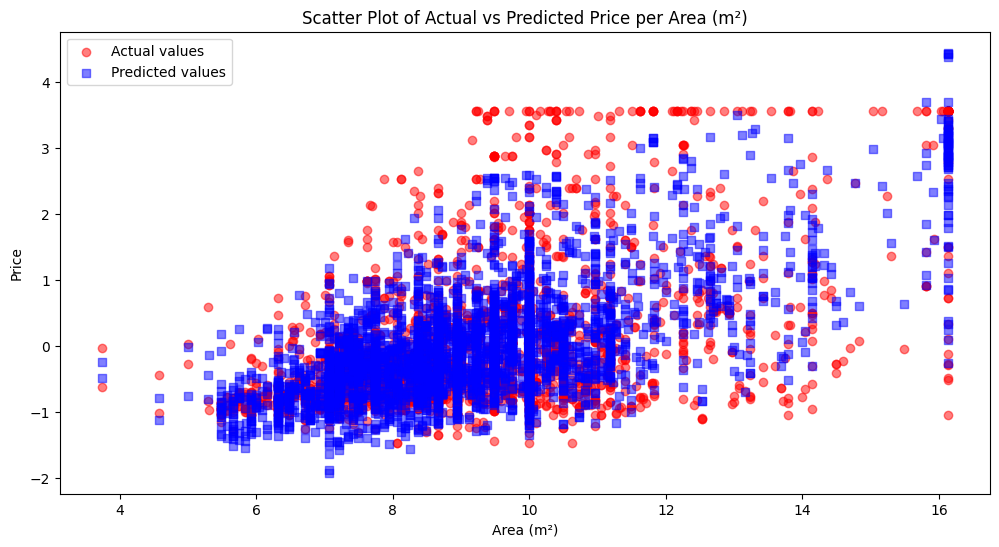

In [13]:
plot_actual_vs_predicted(X_train, y_train, y_pred_train, "Area (m²)", "Area (m²)", "Price")

- Validation set 

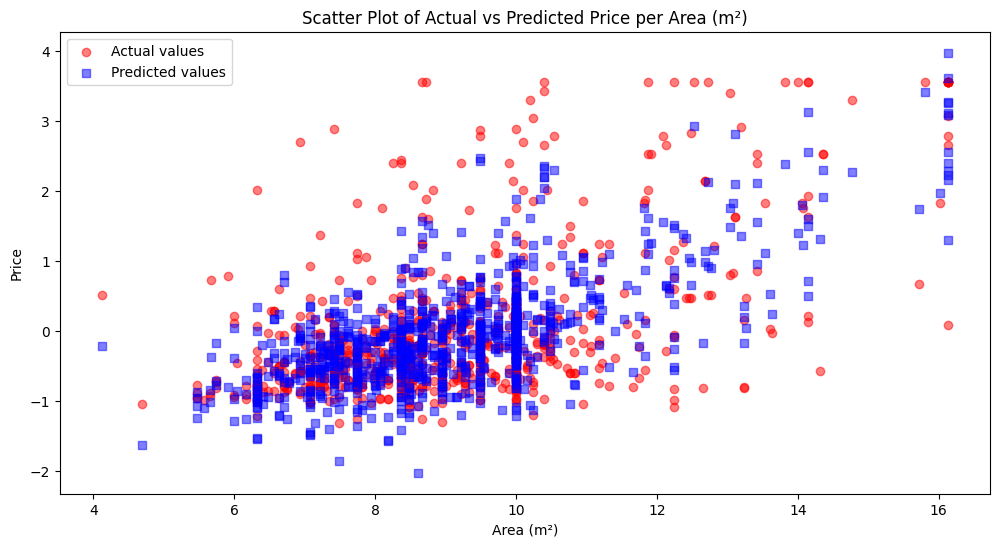

In [14]:
plot_actual_vs_predicted(X_validation, y_validation, y_pred_validation, "Area (m²)", "Area (m²)", "Price")

#### Conclusion

##### Advantages
<li>Provides a more stable solution than conventional Linear Regression by minimizing the magnitude of the coefficients, which improves accuracy and reduces the risk of overfitting</li>
<li>Maintains flexibility so that the model can adapt to new data</li>

##### Disadvantages
<li>More complex than Linear Regression</li>
<li>Not stable because changing random_state values ​​can cause model performance fluctuations</li>